# scikit-learn中的PCA使用

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
pca.components_ # 和我们自己封装的方法得到的向量刚好相反，不过不用担心，结果是不影响地

array([[-0.7729643 , -0.63444952]])

In [6]:
X_reduction = pca.transform(X)

In [8]:
X_reduction.shape

(100, 1)

In [9]:
X_restore = pca.inverse_transform(X_reduction)

In [10]:
X_restore.shape

(100, 2)

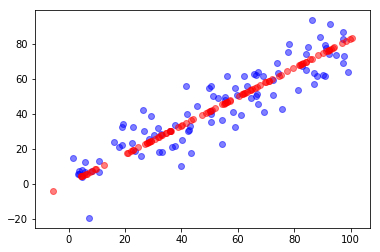

In [11]:
'''数据绘制,可以看出降维会导致数据丢失，还原(inverse)也没用'''
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

## 真实数据中使用PCA

In [13]:
from sklearn import datasets

In [14]:
digits = datasets.load_digits()

In [15]:
X = digits.data
y = digits.target

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [18]:
X_train.shape

(1347, 64)

In [21]:
'''K近邻算法'''
% %time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 26.2 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knn_clf.score(X_test, y_test)

0.98666666666666669

In [24]:
'''PCA进行降维,训练耗时会减少很多'''
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [28]:
% %time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.9 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
'''降维会降低准确度'''
knn_clf.score(X_test_reduction, y_test)

0.60666666666666669

## 主成分所揭示的方差

In [30]:
'''训中最合适的降到的维度'''
pca.explained_variance_ratio_

array([ 0.14566817,  0.13735469])

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([  1.45668166e-01,   1.37354688e-01,   1.17777287e-01,
         8.49968861e-02,   5.86018996e-02,   5.11542945e-02,
         4.26605279e-02,   3.60119663e-02,   3.41105814e-02,
         3.05407804e-02,   2.42337671e-02,   2.28700570e-02,
         1.80304649e-02,   1.79346003e-02,   1.45798298e-02,
         1.42044841e-02,   1.29961033e-02,   1.26617002e-02,
         1.01728635e-02,   9.09314698e-03,   8.85220461e-03,
         7.73828332e-03,   7.60516219e-03,   7.11864860e-03,
         6.85977267e-03,   5.76411920e-03,   5.71688020e-03,
         5.08255707e-03,   4.89020776e-03,   4.34888085e-03,
         3.72917505e-03,   3.57755036e-03,   3.26989470e-03,
         3.14917937e-03,   3.09269839e-03,   2.87619649e-03,
         2.50362666e-03,   2.25417403e-03,   2.20030857e-03,
         1.98028746e-03,   1.88195578e-03,   1.52769283e-03,
         1.42823692e-03,   1.38003340e-03,   1.17572392e-03,
         1.07377463e-03,   9.55152460e-04,   9.00017642e-04,
         5.79162563e-04,

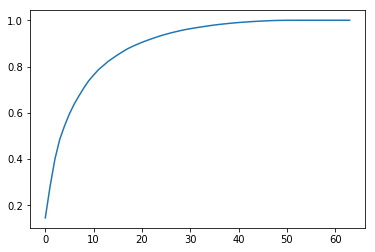

In [33]:
'''可以看出降维的维度数对整体数据的保留比是多少'''
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [34]:
'''需要保留95%的数据'''
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.n_components_ # 只用28个维度就能保留95%的数据

28

In [39]:
'''重新更新训练和测试数据'''
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [40]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.77 ms


In [42]:
knn_clf.score(X_test_reduction, y_test) # 准确度几乎不受影响

0.97999999999999998

## 数据降到2维使用PCA对数据进行降维可视化

In [43]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

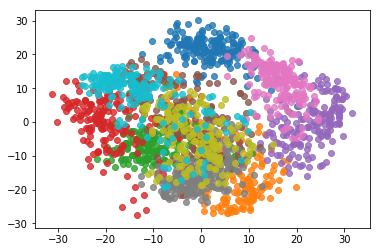

In [44]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8) # y==i表示不同的类别
plt.show()